In [1]:
import pandas as pd

import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 12)

Populating the interactive namespace from numpy and matplotlib


Data from Ágnes Kalivoda.

In [2]:
prev_feat = pd.read_csv('./dat/preverb_features.csv', index_col=0, sep='\t')
prev_feat.head()

,Szótagszám,Duplikálhatóság,NOM + NEG,-fele/felé,Gyakoriság,Produktivitás
Igekötő,,,,,,
abba,2,0,1,0,11868,6
agyon,2,1,0,0,8644,575
alul,2,0,0,1,6659,167
alább,2,0,0,0,1356,15
alá,2,4,4,34,43052,565


In [11]:
def loglogfeature(feature='Produktivitás', smoothing=1):#, freq_cutoff=20, feat_cutoff=1):
    plt.scatter(prev_feat['Gyakoriság']+smoothing, prev_feat[feature]+smoothing)
    plt.xscale('log')
    plt.yscale('log')
    for label, x, y in zip(prev_feat.index, prev_feat['Gyakoriság']+smoothing, prev_feat[feature]+smoothing):
        #if False:#xy[0] > freq_cutoff and xy[1] > feat_cutoff:
        plt.annotate(label, (x,y))

# Background: a generative model
 
A duplikált és a sima gyakoriság hányadosát javaslom, pl. meg esetén 5121 / 4912169 = 1.4 exp(-3). Ez a hányados úgy interpretálható egy generatív modellben, mintha először egyszeresen kerülnének be az igekötők a szövegbe, majd valamekkora valséggel duplikálódnának. Hogy mekkorával, az függ attól, hogy mi az igekötő. Tehát ez a valség az adott igekötő publikálódékonyságának a mértéke.

# Productivity

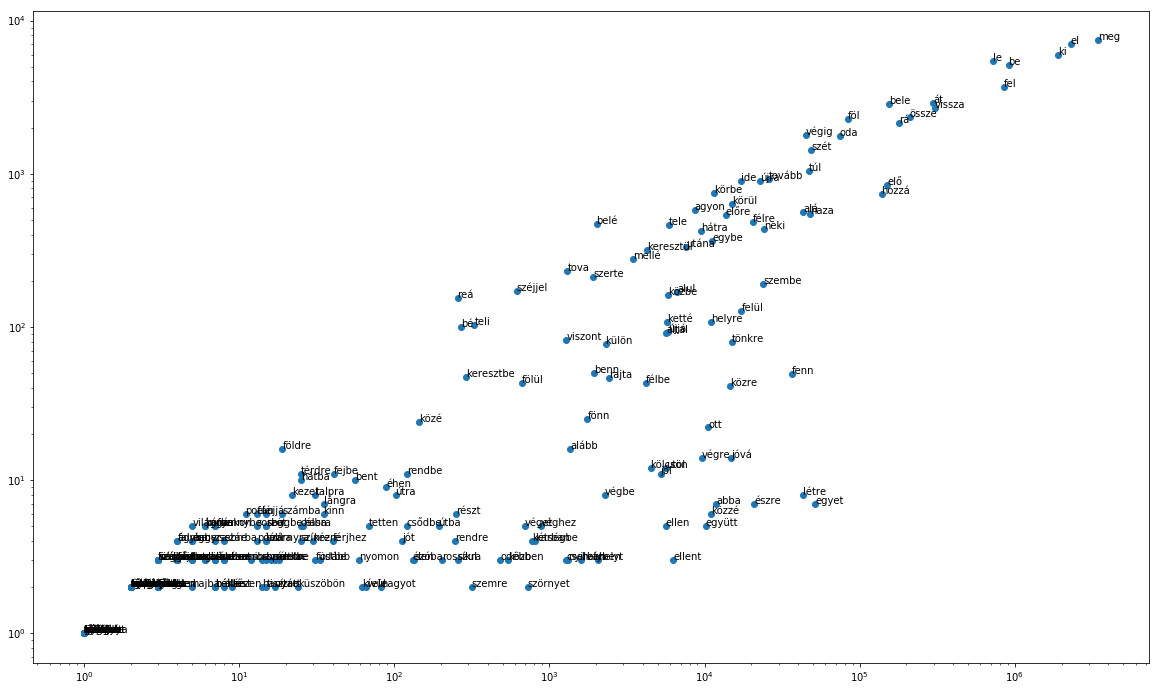

In [12]:
loglogfeature()

A produktivitáshoz kirajzoltam az igekötők típus- és tokengyakoriságát (az előbbi alatt azt értem, amit a táblázatban produktivitásnak hívtál) log-log skálán (add-one smoothinggal).

Jobb fölül vannak a _meg_-félék, amiknek mindkét gyakorisága nagy, bal alul a hapaxok, amikről nem tudunk semmit mondani. Úgy látom, hogy a kettő között az átló mentén vannak a közepes gyakoriságú de produktív igekötők (_tova_), jobbra lent pedig a gyakori, de nem produktívak (pl. _létre_). A _részt_-re és a _csődbé_-re ez alapján azt mondanám, hogy közepesen produktívak. 

Tehát úgy tűnik, hogy a kétféle gyakoriság hányadosa tényleg jól jellemzi a produktivitást, csak előbb mindkét gyakoriságnak a logaritmusát kell venni. A legproduktívabbak esetében a tokengyakoriság kb. két nagyságrenddel nagyobb, mint a típus-, a kevésbé produktívak esetében ez a hányados nagyobb.

Esetleg még az lehet érdekes, hogy az _alá, haza_ környékén van egy öböl: ami ezeknél gyakoribb, az már mind produktív is. De lehet, hogy ez függ a korpuszmérettől.

# Less frequent phenomena

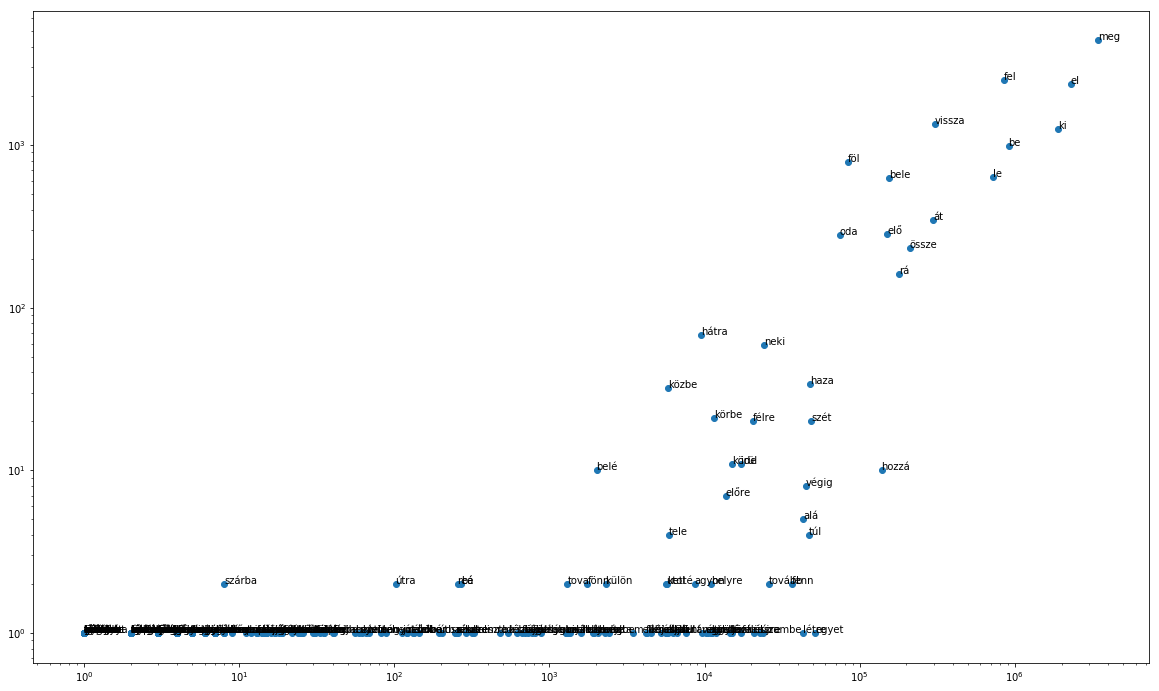

In [5]:
loglogfeature('Duplikálhatóság')

The plot above shows that the log frequency of the duplicated forms is proportional to that of the overall (token) frequency, but some preverbs like _hozzá_ or _túl_ are more rarely **duplicated** as it would be expected from  their frequency. This can be explained by that the meaning  of the verb expression they enter is incompatible with repetition (_hozzákezd -hez_ `start`, túljut `get over`).

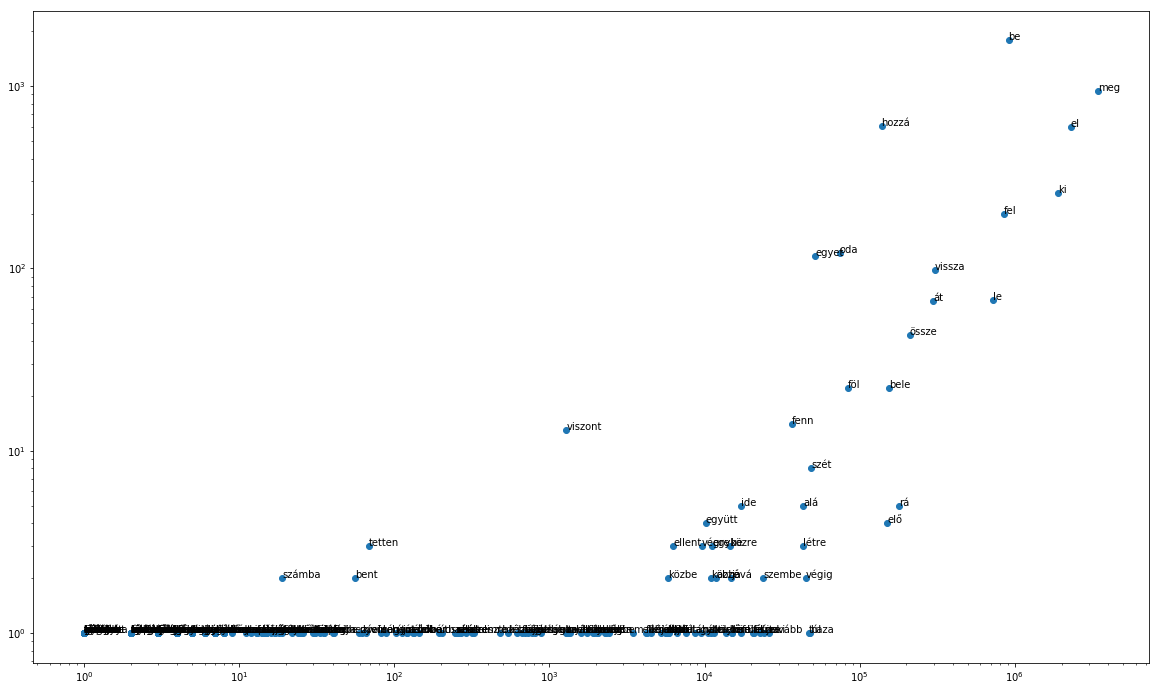

In [6]:
loglogfeature('NOM + NEG')

This plot suggest that preverbs are more homogenous with respest to **negative nominalization** (_össze nem hangolás_ `being unharminzed` lit. together not tuning). Outliers may be adverbials or other POSs annotated as preverbs  (be `in`, hozzá `to it`, oda `there`, egyet `one+ACC`, viszont `although`).

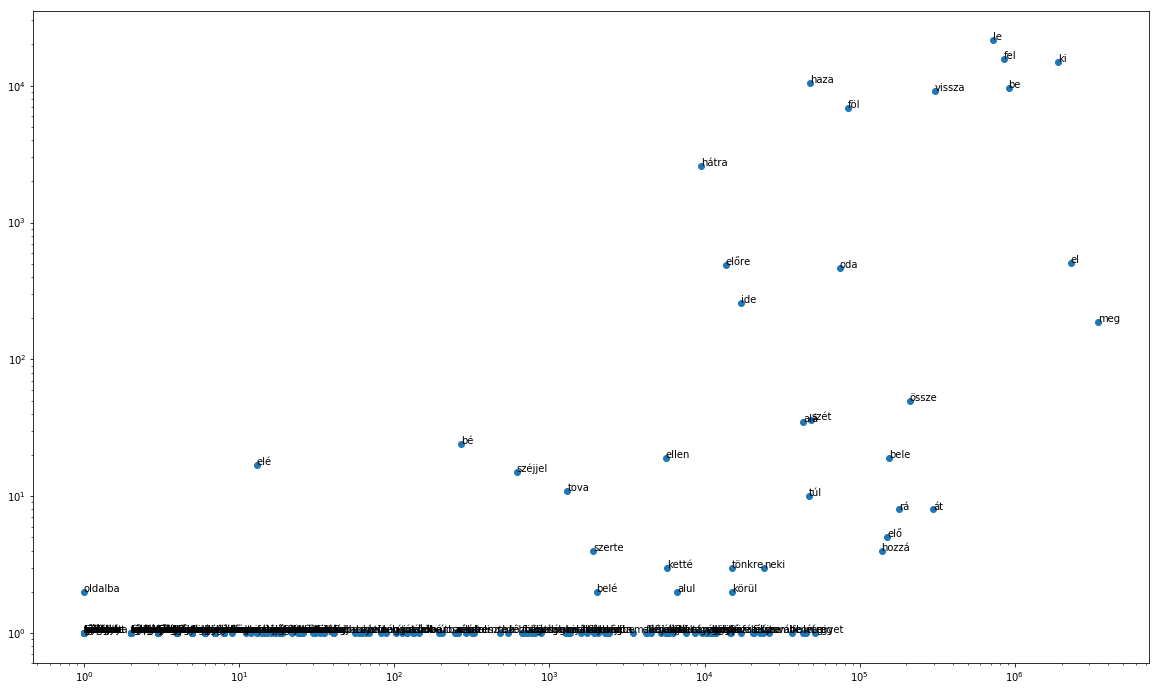

In [7]:
loglogfeature('-fele/felé')

The log frequency ratio of _-fele/felé_  suffixed and bare forms clearly distinguishes locative preverbs (_hátra_ `back`, _haza_ `(to) home`) from more typical preverbs like the pure perfectivizer _meg_ or the incoative _hozzá_.

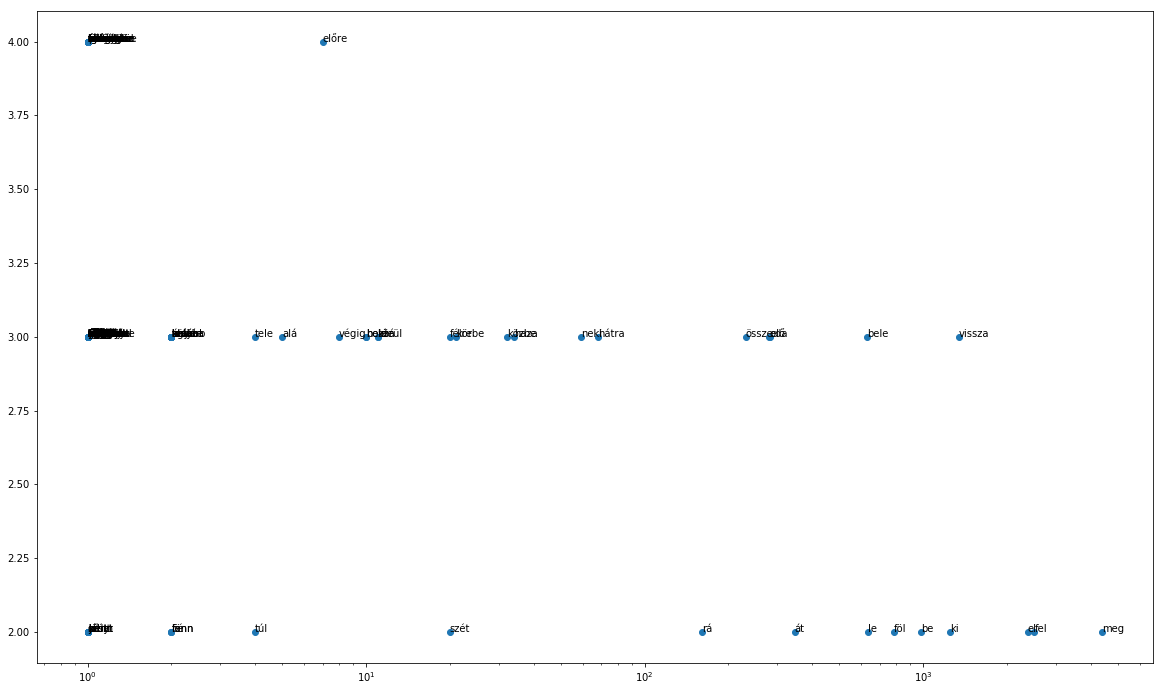

In [20]:
smoothing = 1
plt.scatter(prev_feat['Duplikálhatóság']+smoothing, prev_feat['Szótagszám']+smoothing)
for label, x, y in zip(prev_feat.index, prev_feat['Duplikálhatóság']+smoothing, prev_feat['Szótagszám']+smoothing):
        #if False:#xy[0] > freq_cutoff and xy[1] > feat_cutoff:
        plt.annotate(label, (x,y))
        plt.xscale('log')
